In [ ]:
import warnings
import sys
import os
import pathlib
import torch 
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

warnings.filterwarnings('ignore')
sys.path.insert(0, str(pathlib.Path.cwd()/"src"))
%load_ext autoreload
%autoreload 2


In [2]:
import loaders.goes
import fields.vector_field

In [22]:
date = "2024-09-20"
band = 8

# Load data
dsf = loaders.goes.discrete_scalar_field(date=date, 
                                        band = band, 
                                        start = "00:00", 
                                        end = "04:05", 
                                        by = "00:30", 
                                        extent=(-86.1, -75.1, 30, 37.1))




📦 Finished downloading [49] files to [/home/yf297/data/noaa-goes16/ABI-L2-CMIPC].


In [39]:
fig = dsf.plot(gif = True)
HTML(fig.to_html5_video())

In [34]:
cvf = fields.vector_field.ContinuousVectorField()
cvf.train(dsf, 
          epochs=50,
          nn=1, 
          k=2, 
          size=4000)


fitting flow
[0.8033229112625122, 0.7855435609817505, 0.771572470664978]
Epoch 1/50 — Avg NLL: 0.8569 — lengthscales: 5.93, 0.17, 0.17
[0.8731450438499451, 0.8859179615974426, 0.8631108999252319]
Epoch 2/50 — Avg NLL: 0.7790 — lengthscales: 5.92, 0.18, 0.17
[0.9063165783882141, 0.9277723431587219, 0.8974348902702332]
Epoch 3/50 — Avg NLL: 0.7566 — lengthscales: 5.91, 0.18, 0.17
[0.8878552913665771, 0.8933514356613159, 0.861441433429718]
Epoch 4/50 — Avg NLL: 0.7277 — lengthscales: 5.91, 0.18, 0.17
[0.8713893890380859, 0.860954225063324, 0.8099924921989441]
Epoch 5/50 — Avg NLL: 0.7059 — lengthscales: 5.91, 0.18, 0.17
[0.8889875411987305, 0.8628657460212708, 0.8036556243896484]
Epoch 6/50 — Avg NLL: 0.6564 — lengthscales: 5.91, 0.18, 0.17
[0.9297821521759033, 0.8871418237686157, 0.8401064872741699]
Epoch 7/50 — Avg NLL: 0.6027 — lengthscales: 5.91, 0.18, 0.17
[0.9752339720726013, 0.9212610721588135, 0.8924355506896973]
Epoch 8/50 — Avg NLL: 0.6059 — lengthscales: 5.91, 0.18, 0.17
[1.050

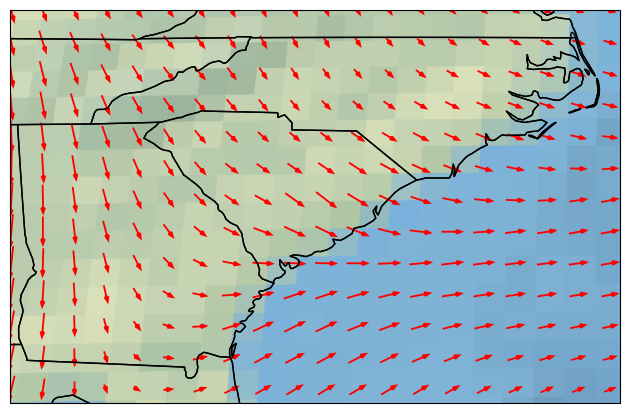

In [40]:
cvf.plot(dsf.coord_field, frame = 0, factor = 12, gif = False)


In [36]:
import time
seconds = dsf.coord_field.T[4]
t = time.strftime("%H:%M", time.gmtime(int(seconds)))

date = "2024-09-20"
band = 8
dvf = loaders.goes.discrete_vector_field(date = date, 
                                         time = t,
                                         band = band,
                                         extent=(-86.1, -75.1, 30, 37.1))

 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-DMWVC/2024/264/02/OR_ABI-L2-DMWVC-M6C08_G16_s20242640201171_e20242640203544_c20242640234286.nc
📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-DMWVC].
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2025/001/00/OR_ABI-L2-CMIPC-M6C09_G16_s20250010001173_e20250010003552_c20250010004053.nc
📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-CMIPC].


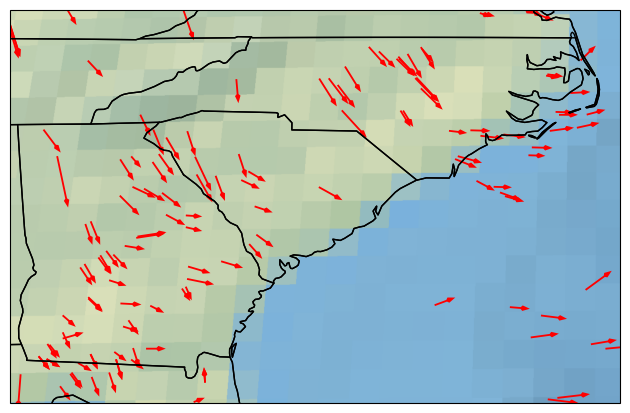

In [37]:
dvf.plot(gif = False)